### 1. Loading Libraries

In [2]:
# This helps to inport all necessary libraries required to pull the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

# Step 1. Data Garthering

#### (i) Import Enhanced Twitter Archive

In [4]:
# Importing the first dataset - advanced twitter archive
t_archive = pd.read_csv(r'C:\Users\User\Downloads\twitter-archive-enhanced.csv') 

#### (ii) Download Tweet Image Predictions

In [7]:
# The approach is to download the data programmatically using the requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

#### (iii) Getting Tweet Data from Tweeter API

In [9]:
# The plan is to query each tweet in the tweeter archive and save json in a text file
import tweepy
from tweepy import OAuth2UserHandler
import json
from timeit import default_timer as timer

consumer_key = 'Your Customer_Key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
# The plan is to query each tweet in the tweeter archive and save json in a text file
import tweepy
from tweepy import OAuth2UserHandler
import json
from timeit import default_timer as timer

consumer_key = 'Your Customer_Key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = t_archive.tweet_id.values
len(tweet_ids)



In [12]:
# Query Twitter's API for JSON data for each tweet ID in the twitter archive
count = 0 
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will take about 20-30mins to run 
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print('Fail')
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079: 739485634323156992
Fail
1080:

Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354:

Success
1587: 686760001961103360
Success
1588: 686749460672679938
Success
1589: 686730991906516992
Success
1590: 686683045143953408
Success
1591: 686618349602762752
Success
1592: 686606069955735556
Success
1593: 686394059078897668
Success
1594: 686386521809772549
Success
1595: 686377065986265092
Success
1596: 686358356425093120
Success
1597: 686286779679375361
Success
1598: 686050296934563840
Success
1599: 686035780142297088
Success
1600: 686034024800862208
Success
1601: 686007916130873345
Success
1602: 686003207160610816
Success
1603: 685973236358713344
Success
1604: 685943807276412928
Success
1605: 685906723014619143
Success
1606: 685681090388975616
Success
1607: 685667379192414208
Success
1608: 685663452032069632
Success
1609: 685641971164143616
Success
1610: 685547936038666240
Success
1611: 685532292383666176
Success
1612: 685325112850124800
Success
1613: 685321586178670592
Success
1614: 685315239903100929
Success
1615: 685307451701334016
Success
1616: 685268753634967552
Success
16

Success
1836: 676101918813499392
Success
1837: 676098748976615425
Success
1838: 676089483918516224
Success
1839: 675898130735476737
Success
1840: 675891555769696257
Success
1841: 675888385639251968
Success
1842: 675878199931371520
Success
1843: 675870721063669760
Success
1844: 675853064436391936
Success
1845: 675849018447167488
Success
1846: 675845657354215424
Success
1847: 675822767435051008
Success
1848: 675820929667219457
Success
1849: 675798442703122432
Success
1850: 675781562965868544
Success
1851: 675740360753160193
Success
1852: 675710890956750848
Success
1853: 675707330206547968
Success
1854: 675706639471788032
Success
1855: 675534494439489536
Success
1856: 675531475945709568
Success
1857: 675522403582218240
Success
1858: 675517828909424640
Success
1859: 675501075957489664
Success
1860: 675497103322386432
Success
1861: 675489971617296384
Success
1862: 675483430902214656
Success
1863: 675432746517426176
Success
1864: 675372240448454658
Success
1865: 675362609739206656
Success
18

Success
2085: 670807719151067136
Success
2086: 670804601705242624
Success
2087: 670803562457407488
Success
2088: 670797304698376195
Success
2089: 670792680469889025
Success
2090: 670789397210615808
Success
2091: 670786190031921152
Success
2092: 670783437142401025
Success
2093: 670782429121134593
Success
2094: 670780561024270336
Success
2095: 670778058496974848
Success
2096: 670764103623966721
Success
2097: 670755717859713024
Success
2098: 670733412878163972
Success
2099: 670727704916926465
Success
2100: 670717338665226240
Success
2101: 670704688707301377
Success
2102: 670691627984359425
Success
2103: 670679630144274432
Success
2104: 670676092097810432
Success
2105: 670668383499735048
Success
2106: 670474236058800128
Success
2107: 670468609693655041
Success
2108: 670465786746662913
Success
2109: 670452855871037440
Success
2110: 670449342516494336
Success
2111: 670444955656130560
Success
2112: 670442337873600512
Success
2113: 670435821946826752
Success
2114: 670434127938719744
Success
21

Success
2334: 666337882303524864
Success
2335: 666293911632134144
Success
2336: 666287406224695296
Success
2337: 666273097616637952
Success
2338: 666268910803644416
Success
2339: 666104133288665088
Success
2340: 666102155909144576
Success
2341: 666099513787052032
Success
2342: 666094000022159362
Success
2343: 666082916733198337
Success
2344: 666073100786774016
Success
2345: 666071193221509120
Success
2346: 666063827256086533
Success
2347: 666058600524156928
Success
2348: 666057090499244032
Success
2349: 666055525042405380
Success
2350: 666051853826850816
Success
2351: 666050758794694657
Success
2352: 666049248165822465
Success
2353: 666044226329800704
Success
2354: 666033412701032449
Success
2355: 666029285002620928
Success
2356: 666020888022790149
Success
1342.4997521
{888202515573088257: NotFound('404 Not Found\n144 - No status found with that ID.'), 873697596434513921: NotFound('404 Not Found\n144 - No status found with that ID.'), 872668790621863937: NotFound('404 Not Found\n144 - 

In [16]:
# Convert the text file to a list of where each element contains one item of tweet information
tweet_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet_list.append(json.loads(line))

In [18]:
# Calling the first item of the tweet
print(tweet_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [28]:
# limiting the entire tweet items with a dataframe of id, retweet count and favorite count

tweet_data = pd.DataFrame(tweet_list, columns = ['id',
                                                'retweet_count',
                                                'favorite_count'])

In [29]:
# calling the first 5 rows of the tweet data
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,7006,33812
1,892177421306343426,5301,29327
2,891815181378084864,3480,22046
3,891689557279858688,7225,36933
4,891327558926688256,7758,35308


In [30]:
# One can also change the name of the id column to tweet_id to make it more readable

tweet_data = tweet_data.rename(columns = {'id' : 'tweet_id'})
tweet_data.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33812
1,892177421306343426,5301,29327
2,891815181378084864,3480,22046
3,891689557279858688,7225,36933
4,891327558926688256,7758,35308


In [32]:
# Saving the data as a csv file
tweet_data.to_csv('tweet_data.csv', index = False)

In [33]:
# Confirming if the data is truly saved as accliamed
df = pd.read_csv('tweet_data.csv')
df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33812
1,892177421306343426,5301,29327
2,891815181378084864,3480,22046


# Step 2: Assessing Data

### One can access data virtually or programmatically
###### Virstual assessment could be done on google sheet, excel, text editor through scroling left and right. Hoever, this might be a bit stressful if one is working on a big dataset.
#### Programmatic would be the best bet, using pandas .info, .describe, .head, .tail functions to quickly assess the data
#### Two issues can occur while assessing data. 
- Quality : this is issue with content or dirty data -
- Tidiness: Structural issues - Messy data -

### 2a. Assessing Enhanced Tweet Archive

In [35]:
# first 5 rows of the data
t_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
# random sample of 8 different rows
t_archive.sample(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None
242,846153765933735936,NaN,NaN,2017-03-27 00:15:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/846153765...,13,10,Vixen,None,None,None,None
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None
354,831262627380748289,NaN,NaN,2017-02-13 22:03:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's feeling h*ckin festive an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831262627...,12,10,Tucker,None,None,None,None
2117,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,None,None,None,None


In [91]:
# datatyoes, nulls and not nulls of the different columns
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
# descriptive analytics of the numeric data
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [39]:

t_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [44]:
# extracting nos of rows which have rating numerator less than 10
t_archive[t_archive.rating_numerator < 10].count()[0]

# 440 rows of data have rating numerator less than 10

440

In [47]:
# checking which id has numerator less than 10
t_archive[t_archive.rating_numerator < 10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [51]:
# Check rating enumerator of tweet_id 666337882303524864

t_archive.loc[(t_archive.tweet_id == 666337882303524864), 'rating_numerator']

2333    9
Name: rating_numerator, dtype: int64

In [53]:
# Check rating enumerator Text of tweet_id 666337882303524864
t_archive.loc[2333, 'text']

'This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL'

In [56]:
t_archive.rating_denominator.describe()
# Worthy of note that some of the denominator have a 0 value

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [60]:
# Confirm which tweet_id has a 0 denominator
t_archive[t_archive.rating_denominator == 0].tweet_id
# There is only one tweet_id with a 0 value at the denominator

313    835246439529840640
Name: tweet_id, dtype: int64

In [61]:
# confirm the tweet text of the 0 denominator
t_archive.loc[313, 'text']

# It was observed that someone was tryng to correct @jonnysun

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [70]:
# confirming denominators that are not 10
t_archive[t_archive.rating_denominator != 10].count()[0]

23

In [71]:
t_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### 2b. Assessing Tweet Image Predictions

In [73]:
#using pandas csv to read a tab separated values (tsv) datapoint
img_predictions = pd.read_csv('image-predictions.tsv', sep = '\t') 

#call the first 5 rows of the dataframe
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [75]:
# Total no of rows in the dataframe
len(img_predictions)

2075

In [76]:
# Randomly display 10 sample rows of the dataframe
img_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/67695...,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True
1485,781661882474196992,https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg,1,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
698,684567543613382656,https://pbs.twimg.com/media/CYASi6FWQAEQMW2.jpg,1,minibus,0.401942,False,llama,0.229145,False,seat_belt,0.209393,False
757,688547210804498433,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1,papillon,0.531279,True,Blenheim_spaniel,0.214197,True,Border_collie,0.053840,True
518,676470639084101634,https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg,1,golden_retriever,0.790386,True,borzoi,0.022885,True,dingo,0.015343,False
1816,833863086058651648,https://pbs.twimg.com/media/C5J6DIpWQAEosSz.jpg,1,kuvasz,0.494969,True,Great_Pyrenees,0.312632,True,golden_retriever,0.141736,True


In [78]:
# Pulling the image url for index 1485
img_predictions.loc[1485, 'jpg_url']

'https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg'

In [79]:
# Using the Ipython.display Object and Image function to display a sample image 
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CtkFS72WcAAiUrs.jpg')

In [81]:
# Using the Ipython.display Object and Image function to display a sample image 
Image(url = 'https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg')

In [82]:
# confirming the details within the image predictions dataframe
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [92]:
len(img_predictions)

2075

### 2c. Assessing Tweet Datasets from Twitter API

In [84]:
# Assessing the first five rows of the data
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33812
1,892177421306343426,5301,29327
2,891815181378084864,3480,22046
3,891689557279858688,7225,36933
4,891327558926688256,7758,35308


In [85]:
# Assessing 10 random samples of the twitter API Dataset
tweet_data.sample(10)

,tweet_id,retweet_count,favorite_count
354,828408677031882754,1188,7263
1162,676590572941893632,110,840
1112,678380236862578688,823,2243
1459,670427002554466305,142,464
1286,673709992831262724,236,753
578,798686750113755136,2180,0
1337,672604026190569472,337,973
157,860184849394610176,5125,15022
1007,682808988178739200,155,1631
659,789137962068021249,2608,9227


In [87]:
# assessing the statistics of the tweet dataframe
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,1.699000e+03,1699.000000,1699.000000
mean,7.488809e+17,2691.223072,7816.726310
std,7.755383e+16,4198.589790,11668.143132
min,6.660209e+17,1.000000,0.000000
25%,6.740372e+17,410.500000,811.500000
50%,7.612929e+17,1329.000000,2717.000000
75%,8.194677e+17,3272.000000,10740.000000
max,8.924206e+17,51668.000000,124098.000000


In [89]:
# assessing the information of the column types, structures, null and not null values
tweet_data.info()

# There are no null columns from the Tweet_data dataframe as can be seen from the below result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1699 non-null   int64
 1   retweet_count   1699 non-null   int64
 2   favorite_count  1699 non-null   int64
dtypes: int64(3)
memory usage: 39.9 KB


## Tidiness Issues

- Dog stage data is separated into 4 columns
- There is a relationship amongst the data but they have been separated

## Quality Issues
#### (a) Enhanced Twitter Archive Dataset

i.   There are 181 retweets based off the retweeted_status_ids

ii.  Some dog names are invalid (e.g, a, an, & the, instead of a normal name)

iii. Invalid tweet_id data type ( e.g integer instead of string)

iv.  Invalid timestamp data type (string not datetime)

v.   440 rating numerators less than 10 (e.g 1998)

vi.  Row 313 has 0 denominator

vii. 23 rating denominators not equal to 10 

#### (b) Tweet Image Predictions

i.   Underscores were used as a peparator of columns p1, p2 and p3 instead of spaces

ii.  Inconsistencies with the first letter with regards to P names, some Upper and some Lower case 

iii  Missing photos for some IDs

#### (c) Tweet Data from API

i.   Invalid tweet_id data type ( e.g integer instead of string)

# Step 3: Cleaning Data

### 3a. Create copies of the dataframe

In [161]:
# use the .copy function to create a different copy of the individual dataframes
clean_archive = t_archive.copy()
clean_img_predictions = img_predictions.copy()
clean_tweet_data = tweet_data.copy()

In [162]:
# confirm the clean_archive dataframe with just a single item
clean_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [163]:
# confirm the clean_img predictions dataframe with just a single item
clean_img_predictions.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [164]:
# confirm the clean_tweet_data dataframe with just a single item
clean_tweet_data.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33812


### 3b. Cleaning tidiness issues

##### i. Dog Stage data is separated into 4 columns

#### Define

- merge the 4 columns into 1 column called dog_stage

#### Code

In [165]:
# Extracting dog stage from the text column into the new dog_stage column
clean_archive['dog_stage'] =  clean_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [166]:
# Dropping unnecessary columns
clean_archive = clean_archive.drop(columns = ['doggo','floofer', 'pupper', 'puppo'])

#### Test

In [167]:
# Confirm the new column count of value
clean_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

#### ii. There is a relationship amongst the data but they have been separated

#### Define

- merge all dataframe into one combined dataframe based on their tweet_ids

#### Code

In [168]:
# merge clean clean_archive and clean_data from API
clean_archive = pd.merge(clean_archive, clean_tweet_data, on = 'tweet_id', how = 'left')

# merge the output from above with the clean_img_pediction dataframe on tweet_id
clean_archive = pd.merge(clean_archive, clean_img_predictions, on = 'tweet_id', how = 'left')

#### Test

In [169]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

In [170]:
# displaying p1 with underscore
clean_archive.p1

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper_towel
4                       basset
                 ...          
2351        miniature_pinscher
2352       Rhodesian_ridgeback
2353           German_shepherd
2354                   redbone
2355    Welsh_springer_spaniel
Name: p1, Length: 2356, dtype: object

### 3c. Cleaning Quality issues

#### A quick update is that not all quality issues will be cleaned. If they are not needed for analysis, no point cleaning them

#### i. There are 181 retweets based off the retweeted_status_ids 

#### Define

- Delete all rows that represent retweets and all related columns

#### Code

In [126]:
# Keep only original ids that have no retweet status id
clean_archive = clean_archive[clean_archive.retweeted_status_id.isnull()]
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [127]:
# remove related columns to retweet
clean_archive = clean_archive.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [128]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          1551 non-null   float64
 12  favorite_count         1551 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

##### ii.  Somes dog names are invalid (e.g, a, an, & the, instead of a normal name)

#### Define

Convert invalid names ( None or starting with lower case letter) to NAN and extract names from text column

#### Code

In [130]:
clean_archive.name = clean_archive.name.replace( regex =['^[a-z]+', 'None'], value = np.nan )

# Confirming the number of null value after replacement already took place
sum(clean_archive.name.isnull())

784

In [135]:
# Declaring a function to extracts names from text column and return NAN if there are no name word
def function(txt_value):
    txt_list = txt_value.split()
    for word in txt_list:
        if word.lower() == 'named':
            name_index = txt_list.index(word) + 1 # word after 'named'
            return txt_list[name_index]
        else:
            pass
    return np.nan 

In [138]:
# confirming np.where(condition, what to do if condition is true or not)
clean_archive.name = np.where(clean_archive.name.isnull(), clean_archive.text.apply(function), clean_archive.name)

#### Test

In [139]:
sum(clean_archive.name.isnull())

761

#### iii. Invalid tweet_id data type ( e.g integer instead of string)

#### Define

Change tweet_id to string

#### Code

In [141]:
# convert tweet_id to string
clean_archive.tweet_id = clean_archive.tweet_id.astype(str)

#### Test

In [143]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1414 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          1551 non-null   float64
 12  favorite_count         1551 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

#### iv.  Invalid timestamp data type (string not datetime)

#### Define

Correct invalid datatype by converting timestamp to datatime

#### Code

In [148]:
# Timestamp should be converted to datetime
clean_archive.timestamp = pd.to_datetime(clean_archive.timestamp)

#### Test

In [171]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

#### Tweet Image Predictions Quality Issues
i. Underscores were used as a peparator of columns p1, p2 and p3 instead of spaces

#### Define
Replace underscore with space for p1,p2 and p3

#### Code

In [174]:
clean_archive.p1 = clean_archive.p1.str.replace('_', ' ')
clean_archive.p2 = clean_archive.p2.str.replace('_', ' ')
clean_archive.p3 = clean_archive.p3.str.replace('_', ' ')

#### Test

In [175]:
# display the first 12 rows of data for p1
clean_archive.p1.head(12)

0                       orange
1                    Chihuahua
2                    Chihuahua
3                  paper towel
4                       basset
5     Chesapeake Bay retriever
6                  Appenzeller
7                   Pomeranian
8                Irish terrier
9                     Pembroke
10                     Samoyed
11              French bulldog
Name: p1, dtype: object

In [176]:
# display the first 12 rows of data for p2
clean_archive.p2.head(12)

0                  bagel
1               Pekinese
2               malamute
3     Labrador retriever
4       English springer
5          Irish terrier
6          Border collie
7             Eskimo dog
8           Irish setter
9               Cardigan
10            Pomeranian
11    Labrador retriever
Name: p2, dtype: object

In [177]:
# display the first 12 rows of data for p3
clean_archive.p3.head(12)

0                          banana
1                        papillon
2                          kelpie
3                         spatula
4     German short-haired pointer
5                 Indian elephant
6                       ice lolly
7                        Pembroke
8        Chesapeake Bay retriever
9                       Chihuahua
10                           chow
11                         muzzle
Name: p3, dtype: object

#### ii.  Inconsistencies with the first letter with regards to P names, some Upper and some Lower case

#### Define
Replace all upper and lower case P to Capital letter P

#### Code

In [178]:
# change the lower case first letter p to Uppercase
clean_archive.p1 = clean_archive.p1.str.title()
clean_archive.p2 = clean_archive.p2.str.title()
clean_archive.p3 = clean_archive.p3.str.title()

#### Test

In [180]:
# Display the first 30 rows of the data p1
clean_archive.p1.head(30)

0                       Orange
1                    Chihuahua
2                    Chihuahua
3                  Paper Towel
4                       Basset
5     Chesapeake Bay Retriever
6                  Appenzeller
7                   Pomeranian
8                Irish Terrier
9                     Pembroke
10                     Samoyed
11              French Bulldog
12                    Pembroke
13              French Bulldog
14            Golden Retriever
15                     Whippet
16            Golden Retriever
17            Golden Retriever
18              Siberian Husky
19                    Pembroke
20              French Bulldog
21                      Basset
22                   Limousine
23                    Pembroke
24            Mexican Hairless
25                     Samoyed
26                   Chihuahua
27                      Kuvasz
28                 Convertible
29              French Bulldog
Name: p1, dtype: object

In [184]:
# Confirm if all first letter in p1 are uppercase
(clean_archive.p1.str.istitle()).value_counts()

True    2075
Name: p1, dtype: int64

In [181]:
# Display the first 30 rows of the data p2
clean_archive.p2.head(30)

0                   Bagel
1                Pekinese
2                Malamute
3      Labrador Retriever
4        English Springer
5           Irish Terrier
6           Border Collie
7              Eskimo Dog
8            Irish Setter
9                Cardigan
10             Pomeranian
11     Labrador Retriever
12               Cardigan
13                  Boxer
14     Labrador Retriever
15                 Borzoi
16        Tibetan Mastiff
17     Labrador Retriever
18             Eskimo Dog
19    Rhodesian Ridgeback
20                    Pug
21                Redbone
22              Tow Truck
23    Rhodesian Ridgeback
24               Sea Lion
25             Eskimo Dog
26            Toy Terrier
27         Great Pyrenees
28             Sports Car
29              Chihuahua
Name: p2, dtype: object

In [185]:
# Confirm if all first letter P in p2 are uppercase
(clean_archive.p2.str.istitle()).value_counts()

True    2075
Name: p2, dtype: int64

In [182]:
# Display the first 30 rows of the data p3
clean_archive.p3.head(30)

0                          Banana
1                        Papillon
2                          Kelpie
3                         Spatula
4     German Short-Haired Pointer
5                 Indian Elephant
6                       Ice Lolly
7                        Pembroke
8        Chesapeake Bay Retriever
9                       Chihuahua
10                           Chow
11                         Muzzle
12                        Basenji
13      Staffordshire Bullterrier
14                        Redbone
15                         Saluki
16             Labrador Retriever
17                 English Setter
18                       Malamute
19                         Beagle
20                   Bull Mastiff
21                     Weimaraner
22                  Shopping Cart
23                         Beagle
24                     Weimaraner
25      Staffordshire Bullterrier
26                     Can Opener
27                 Dandie Dinmont
28                      Car Wheel
29            

In [186]:
# Confirm if all first letter P in p3 are uppercase
(clean_archive.p3.str.istitle()).value_counts()

True    2075
Name: p3, dtype: int64

#### iii  Missing photos for some IDs

#### Define
Delete rows with missing photos

#### Code

In [151]:
clean_archive = clean_archive[clean_archive.jpg_url.notnull()]

#### Test

In [152]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1373 non-null   object             
 10  dog_stage              326 non-null    object             
 11  retweet_count          1439 non-null   float64          

# Step 4: Storing data

In [194]:
clean_archive.to_csv('twitter_archive_master.csv')

# Step 5: Analyzing, and visualizing data

#### a. % of different dog stages

In [189]:
# count the individual values of dog stages in the dataframe
dogstage = clean_archive.dog_stage.value_counts()
dogstage

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

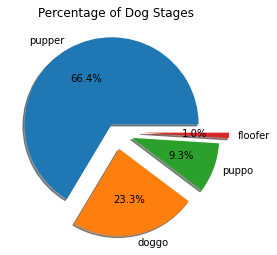

In [191]:
# Visualizing the dog stage counts
plt.pie(dogstage, 
        labels = ['pupper', 'doggo', 'puppo', 'floofer'],
        autopct = '%1.1f%%', 
        shadow = True,
        explode = (0.1, 0.2, 0.2, 0.3)
       )
plt.title('Percentage of Dog Stages');

#### insights from the pie chart
1. Pupper has the highest percentage with a 66.4% of the total aggregate of the data
2. floofer has the least percentage with 1.0%

#### b. Relationship between retweet count and favorite count

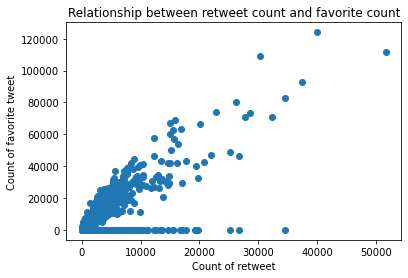

In [193]:
# Plot a scatter plot to confirm the relationship between retweet and favorite count
plt.scatter(clean_archive.retweet_count, clean_archive.favorite_count)
plt.title('Relationship between retweet count and favorite count')
plt.xlabel('Count of retweet')
plt.ylabel('Count of favorite tweet');

#### Insights
- The relationship shows a positive relationship between count of favorite tweet and retweet
- There are some outliers in the data which shows a constant movement between both parameters


# Step 6: Reporting
This reports illustrates the insights and produced visualizations based on the data was wrangled. 
The dataset wrangled within this project is the Twitter user @dog_rates, also known as we WeRateDogs. 
WeRateDogs is a twitter account that rates people's dogs with a humorous comment about the dog.
The ratings have a majority of its ratings with a denominator of 10. 

The numerators attimes were greater than 10. e.g 11/10, 12/10, 13/10, etc. This is so because the dogs were very
good dog bents. The followers of WeRateDogs stood at over 4 millions. The account has received international media coverage

This report was completed with a Jupyter notebook and exported to several document extensions.